In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston, load_iris
from sklearn.metrics import mean_squared_error, classification_report

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

### 1. Regression

In [3]:
data = load_boston()

In [4]:
X, y = data['data'], data['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.15)

In [6]:
X_train.shape

(430, 13)

In [7]:
14 * 32

448

In [8]:
model = Sequential([
    Input(shape=(X_train.shape[1], )),
    Dense(32, activation='sigmoid'),
    Dense(16, activation='sigmoid'),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=1000, verbose=0)

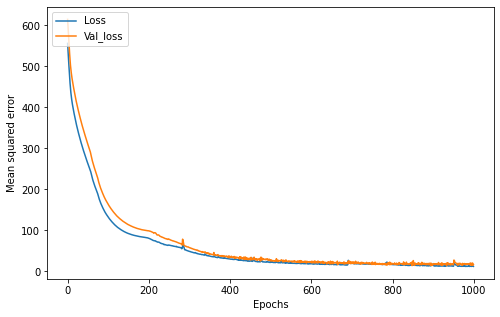

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_loss')
plt.legend(loc='upper left')
plt.ylabel('Mean squared error')
plt.xlabel('Epochs');

In [11]:
y_predicted = [i[0] for i in model.predict(X_test)]
df = pd.DataFrame({'actual': y_test, 'predicted': y_predicted}) 
df

,actual,predicted
0,17.4,20.325144
1,18.4,18.036749
2,12.7,17.344290
3,10.4,12.158787
4,15.0,18.775051
...,...,...
71,20.8,15.755115
72,9.7,12.549266
73,8.7,10.814241
74,37.6,46.112629


In [12]:
mean_squared_error(y_predicted, y_test)

23.87669336111151

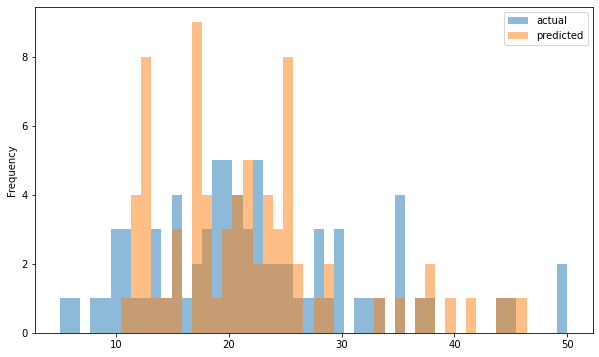

In [13]:
df.plot(kind='hist', bins=50, alpha=0.5, figsize=(10, 6));

In [14]:
model.weights[0]

<tf.Variable 'dense/kernel:0' shape=(13, 32) dtype=float32, numpy=
array([[-3.81303906e-01, -3.45525444e-01,  2.77883291e-01,
        -2.71775305e-01,  1.62165895e-01, -4.17892069e-01,
         2.33979560e-02, -7.39346743e-02, -1.79365829e-01,
        -3.25341552e-01, -3.61953676e-01,  3.16508144e-01,
        -2.36826479e-01, -3.70290399e-01, -4.92440373e-01,
         1.95824504e-01,  1.98444366e-01,  4.91687655e-03,
         4.14751798e-01, -6.66254997e-01, -1.75832406e-01,
        -6.40090346e-01,  3.52984309e-01, -2.18408972e-01,
         2.51026154e-02,  1.20091140e-01,  1.75231323e-01,
        -3.53161663e-01, -3.21596473e-01, -3.36872935e-01,
        -7.17192054e-01,  1.26646280e-01],
       [-2.72464812e-01,  1.41506493e-01,  2.74198167e-02,
        -1.36911914e-01,  3.26891899e-01, -1.55721297e-02,
         1.11187384e-01,  6.30126894e-02,  5.75967133e-02,
         3.08247060e-01, -3.56227569e-02, -1.40172876e-02,
        -1.94813520e-01, -2.69382149e-01,  3.91506450e-03,
     

In [15]:
model.weights[1]

<tf.Variable 'dense/bias:0' shape=(32,) dtype=float32, numpy=
array([ 1.13914184e-01,  0.00000000e+00,  1.99176982e-01, -3.32775302e-02,
        1.15659304e-01,  2.91574687e-01,  1.04187801e-01,  0.00000000e+00,
        0.00000000e+00,  2.49358609e-01, -1.05203530e-02,  4.83235903e-02,
        0.00000000e+00,  5.30097224e-02,  8.65683705e-02, -1.47392021e-17,
        0.00000000e+00,  0.00000000e+00,  9.47492104e-03,  1.36902019e-01,
        0.00000000e+00,  1.55081183e-01,  4.77051064e-02,  0.00000000e+00,
        2.33170942e-28,  0.00000000e+00,  3.90849151e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  6.68970570e-02, -1.07212242e-24],
      dtype=float32)>

In [16]:
model.weights[2]

<tf.Variable 'dense_1/kernel:0' shape=(32, 16) dtype=float32, numpy=
array([[-0.40256014, -0.21222383,  0.00316343, -0.65128636,  0.29282656,
         0.45861304,  0.264941  , -0.1905199 ,  0.2988348 , -0.07588252,
         0.34948367,  0.19830087, -0.50482935, -0.37018353,  1.1652642 ,
        -0.18880591],
       [ 0.01309461, -0.04194472, -0.28660864,  0.07692453, -0.5774404 ,
        -0.48486975, -0.1500303 , -0.31901208,  0.6204978 , -0.2022106 ,
        -0.07180616, -0.2646256 , -0.56503683, -0.41259548,  0.09264533,
         0.09450278],
       [-1.6713747 , -0.0474883 , -0.24575387, -0.19451743,  2.44146   ,
         2.53931   ,  2.1742508 ,  0.33192778,  0.06798993,  2.618649  ,
         1.8503225 ,  1.0147148 , -0.4896144 , -0.29252735, -0.61159855,
         1.9123856 ],
       [-0.03012511, -0.26814675,  0.04851545,  0.22609892, -0.13510992,
         0.13939066,  0.16248527,  0.26533353,  0.31772766,  0.05722508,
        -0.256741  , -0.08154496,  0.15855129, -0.35160577, -0

In [17]:
model.weights[3]

<tf.Variable 'dense_1/bias:0' shape=(16,) dtype=float32, numpy=
array([ 0.3156785 , -0.19826332, -0.26321998, -0.2717388 , -0.37237975,
       -0.35631207, -0.20141844, -0.04802746,  0.44300392, -0.3143146 ,
       -0.29953092, -0.11748472, -0.23822726, -0.19947593, -0.01607064,
       -0.22690387], dtype=float32)>

In [18]:
from tensorflow.keras.models import save_model, load_model

In [19]:
save_model(model, 'boston_model.h5')

### Deploy

In [20]:
A = X_train[1:3, :]
A

array([[3.83518e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.93000e-01,
        5.45300e+00, 1.00000e+02, 1.48960e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.96900e+02, 3.05900e+01],
       [6.37960e-01, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.09600e+00, 8.45000e+01, 4.46190e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.80020e+02, 1.02600e+01]])

In [21]:
housing_model = load_model('boston_model.h5')

def housing_price_prediction(X):
  
    return housing_model.predict(X)

In [31]:
%timeit housing_price_prediction(X_train[10:100, :])

36.6 ms ± 586 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 2. Classification 

In [ ]:
iris = load_iris()